## Plotting results

In [1]:
import altair as alt
import pandas as pd

In [2]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
preds = pd.read_csv('prediction.csv', header=0)
realdata = pd.read_csv('data/TOTAL.csv', header=0)

In [4]:
preds.head()


,price,date,wind,demand,photo,temp,thermo,hydro_disp,hydro_prod
0,2.595259,2017-05-01 01:00:00,7350430,19512600,822,2823.0,101750,16584900,996100
1,2.777927,2017-05-01 02:00:00,6878140,19271400,825,2815.0,101000,16584900,1017200
2,3.107743,2017-05-01 03:00:00,6335000,19283000,872,2809.0,101000,16584900,888100
3,3.107743,2017-12-31 19:00:00,14799900,28535100,304,2846.0,0,17432900,2570500
4,2.967859,2017-05-01 03:00:00,6335000,19283000,872,2809.0,101000,16584900,888100


In [5]:
realdata.head()

,date,price,wind,demand,photo,temp,thermo,hydro_disp,hydro_prod
0,2014-01-01 01:00:00,0.535,11052000,21136100,151,2791.0,0,16503000,1649700
1,2014-01-01 02:00:00,0.500,10774000,19911100,160,2791.0,0,16503000,1492600
2,2014-01-01 03:00:00,0.050,10669000,19060000,151,2792.0,0,16503000,1346200
3,2014-01-01 04:00:00,0.000,10595000,19080200,154,2793.0,0,16503000,1328300
4,2014-01-01 05:00:00,0.000,10242000,18719500,164,2794.0,0,16503000,1304600


In [6]:
realdata=realdata[['date','price']]
preds=preds[['date','price']]

In [7]:
#the data set is too long, so we will reduce it to one year.
preds =preds.sort_values('date').drop_duplicates(subset='date',keep='last')
realdata =realdata.sort_values('date').drop_duplicates(subset=['date', 'price'])

In [8]:
preds=preds.tail(2000)
realdata=realdata.tail(2000)

## Predictions plot

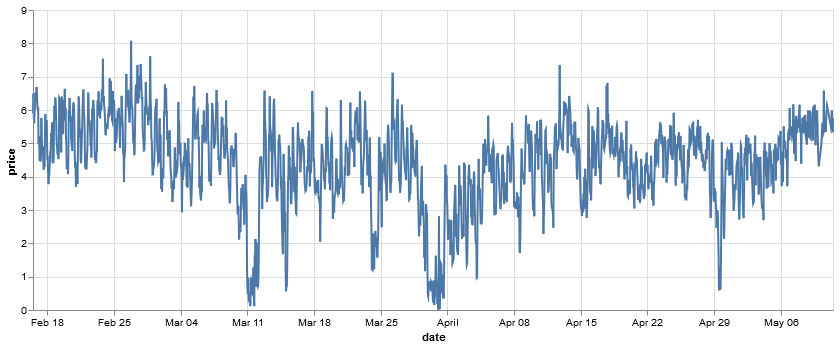

In [9]:
alt.Chart(preds).mark_line().encode(
    x="date:T",
    y="price"
).properties(
   width=800
)

## RealData plot

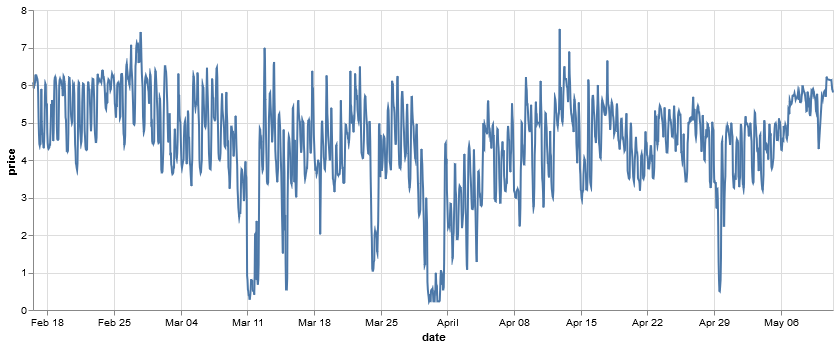

In [10]:
alt.Chart(realdata).mark_line().encode(
    x="date:T",
    y="price"
).properties(
   width=800
)

In [11]:
pre=preds.merge(realdata,left_on='date',right_on='date',how='inner')
pre.head()

,date,price_x,price_y
0,2018-02-16 12:00:00,5.904508,6.069
1,2018-02-16 13:00:00,6.502644,6.021
2,2018-02-16 14:00:00,5.770663,5.901
3,2018-02-16 15:00:00,5.593416,6.001
4,2018-02-16 16:00:00,6.003589,6.005


In [12]:
pre=pre.rename(columns={"price_x": "predict", "price_y": "real"})
pre.head()

In [15]:
pre=pre.head(500)
df=pd.melt(pre,id_vars=['date'],value_vars=['predict','real'])

In [16]:
df=df.round(3)
df.head()

,date,variable,value
0,2018-02-16 12:00:00,predict,5.905
1,2018-02-16 13:00:00,predict,6.503
2,2018-02-16 14:00:00,predict,5.771
3,2018-02-16 15:00:00,predict,5.593
4,2018-02-16 16:00:00,predict,6.004


## Real vs Prediction

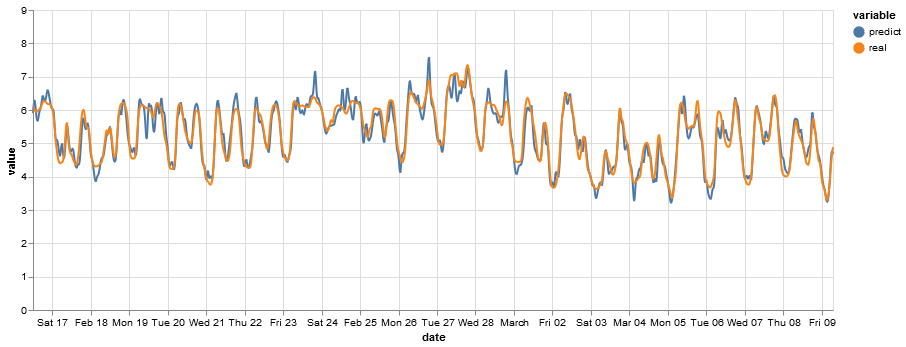

In [24]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

line=alt.Chart(df).mark_line(interpolate='basis').encode(x='date:T',y='value',color='variable')

selectors = alt.Chart(df).mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'value', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(df).mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=800, height=300
)